<font color="#399DA6"><h1>Testing a music</h1></font>

Importing all the required libraries:

    "Load_data": extracts all the features from dataset
    
    "LDA": Linear Discriminant Analysis library

In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0, '../Libraries')
sys.path.insert(0, '../Datas/')

from Load_data import *
from LDA import *
from PCA import *

Using *loaddata()*, all the features from dataset are extracted and stored in a data frame.

Then features and labels are divided.

In [2]:
dataset='591'
df=loaddata(features=["chroma_cqt","melspectrogram"], adr1=f'../Datas/X_{dataset}.pickle',adr2=f'../Datas/label_instrument_{dataset}.pickle',adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1,random_state=0).reset_index(drop=True)
# feature_vectors=df[[f"feature{i}" for i in range(int(dataset))]]
# feature_vectors = df[df.dastgah.values != 0]
feature_vectors=df.drop(["dastgah","instrument"],axis=1)
Label="dastgah"
y=df[Label]
PCAin=False
LDAin=False

n=-1

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(feature_vectors,y,test_size=0.2,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [4]:
clf = KNeighborsClassifier(n_neighbors = 12).fit(X_train,y_train.values.ravel())
yhat = clf.predict(X_test)
acc=metrics.accuracy_score(y_test.values.ravel(), yhat)
print(acc)

0.20863309352517986


In [5]:

df_train=pd.DataFrame(X_train,columns=feature_vectors.columns)
df_train[Label]=y_train

df_train=df_train[df_train["dastgah"]!=n]


In [6]:

X_train=df_train.drop([Label],axis=1)
y_train=df_train[Label]

In [7]:
from preprocess import *
X_train,X_test = preprocess(X_train,X_test)


Utilizing the LDA library, feature conditioning is done and only the selected features are stored in *feature_vectors* data frame.

In [8]:
if(PCAin):
    Pca=pca(X_train)
    X_train=Pca.PCAout(50)
    X_test=Pca.PCA_changeX(X_test)

The selected features are shown:

Classifiers KNN, SVM, MLP, Logistic, Adaboost, and XGBoost are used

<font color="#61C29E"><h1>1) KNN</h2></font>
After classification, accuracy and confusion matrix are reported.

In [9]:
Accuracies = [["KNN",0], ["SVM",0], ["MLP",0], ["Logistic",0], ["Adaboost",0], ["XGBoost",0]]

The best accuracy is 23.24 % with k = 23
Cross-Validation Results:  [0.2072072072072072, 0.23423423423423423, 0.2072072072072072, 0.2702702702702703, 0.24324324324324326]
min validation accuracy is 20.72 % with k = 23
mean validation accuracy is 23.24 % with k = 23
max validation accuracy is 27.03 % with k = 23


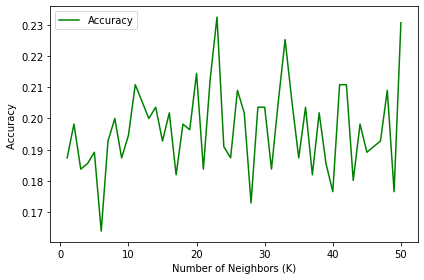

====> Test accuracy is 17.27 % with k = 23


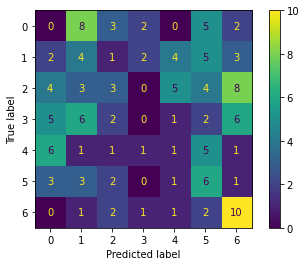

In [10]:
from KNN import *
L=-1
Knn=KNN(X_train,y_train,X_test,y_test)
K=Knn.plot(50,LDAin,L)
# Knn.accurate(K,X_test,y_test,LDAin=LDAin)
Accuracies[0][1] = Knn.acc

<font color="#61C29E"><h1>2) SVM</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.1981981981981982, 0.1981981981981982, 0.23423423423423423, 0.26126126126126126, 0.2882882882882883]
min validation accuracy is 19.82
mean validation accuracy is 23.6
max validation accuracy is 28.83
====> Test accuracy is 28.78


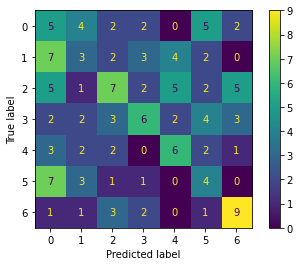

              precision    recall  f1-score   support

         0.0       0.17      0.25      0.20        20
         1.0       0.19      0.14      0.16        21
         2.0       0.35      0.26      0.30        27
         3.0       0.38      0.27      0.32        22
         4.0       0.35      0.38      0.36        16
         5.0       0.20      0.25      0.22        16
         6.0       0.45      0.53      0.49        17

    accuracy                           0.29       139
   macro avg       0.30      0.30      0.29       139
weighted avg       0.30      0.29      0.29       139



In [11]:
from SVM import *
svm=SVM(X_train,y_train,X_test,y_test)
svm.accurate(LDAin=LDAin)
Accuracies[1][1] = svm.acc

<font color="#61C29E"><h1>3) MLP</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.2882882882882883, 0.3783783783783784, 0.32432432432432434, 0.2702702702702703, 0.36036036036036034]
min validation accuracy is 27.03
mean validation accuracy is 32.43
max validation accuracy is 37.84
====> Test accuracy is 38.13


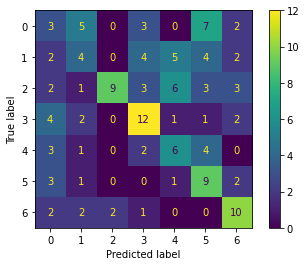

              precision    recall  f1-score   support

         0.0       0.16      0.15      0.15        20
         1.0       0.25      0.19      0.22        21
         2.0       0.82      0.33      0.47        27
         3.0       0.48      0.55      0.51        22
         4.0       0.32      0.38      0.34        16
         5.0       0.32      0.56      0.41        16
         6.0       0.48      0.59      0.53        17

    accuracy                           0.38       139
   macro avg       0.40      0.39      0.38       139
weighted avg       0.43      0.38      0.38       139



In [12]:
from mlp import *
mlp=MLP(X_train,y_train,X_test,y_test)
mlp.accurate(LDAin=LDAin)
Accuracies[2][1] = mlp.acc

<font color="#61C29E"><h1>4) Logistic</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.25225225225225223, 0.25225225225225223, 0.3153153153153153, 0.27927927927927926, 0.25225225225225223]
min validation accuracy is 25.23
mean validation accuracy is 27.03
max validation accuracy is 31.53
====> Test accuracy is 25.9


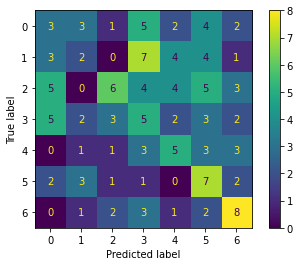

              precision    recall  f1-score   support

         0.0       0.17      0.15      0.16        20
         1.0       0.17      0.10      0.12        21
         2.0       0.43      0.22      0.29        27
         3.0       0.18      0.23      0.20        22
         4.0       0.28      0.31      0.29        16
         5.0       0.25      0.44      0.32        16
         6.0       0.38      0.47      0.42        17

    accuracy                           0.26       139
   macro avg       0.26      0.27      0.26       139
weighted avg       0.27      0.26      0.25       139



In [13]:
from LogisticRegression import *
lr=LR(X_train,y_train,X_test,y_test)
lr.accurate(LDAin=LDAin)
Accuracies[3][1] = lr.acc

<font color="#61C29E"><h1>5) AdaBoost</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.22522522522522523, 0.21621621621621623, 0.2072072072072072, 0.1891891891891892, 0.23423423423423423]
min validation accuracy is 18.92
mean validation accuracy is 21.44
max validation accuracy is 23.42
====> Test accuracy is 17.99


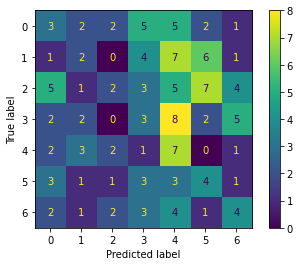

              precision    recall  f1-score   support

         0.0       0.17      0.15      0.16        20
         1.0       0.17      0.10      0.12        21
         2.0       0.22      0.07      0.11        27
         3.0       0.14      0.14      0.14        22
         4.0       0.18      0.44      0.25        16
         5.0       0.18      0.25      0.21        16
         6.0       0.24      0.24      0.24        17

    accuracy                           0.18       139
   macro avg       0.18      0.20      0.18       139
weighted avg       0.18      0.18      0.17       139



In [14]:
from adaboost import *
adaboost=ADABOOST(X_train,y_train,X_test,y_test)
adaboost.accurate(LDAin=LDAin)
Accuracies[4][1] = adaboost.acc

<font color="#61C29E"><h1>6) XGBoost</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.32432432432432434, 0.2972972972972973, 0.3783783783783784, 0.36036036036036034, 0.3333333333333333]
min validation accuracy is 29.73
mean validation accuracy is 33.87
max validation accuracy is 37.84
====> Test accuracy is 37.41


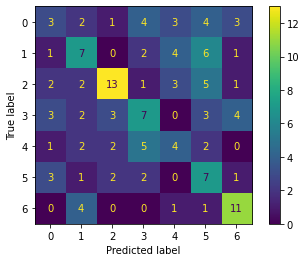

              precision    recall  f1-score   support

         0.0       0.23      0.15      0.18        20
         1.0       0.35      0.33      0.34        21
         2.0       0.62      0.48      0.54        27
         3.0       0.33      0.32      0.33        22
         4.0       0.27      0.25      0.26        16
         5.0       0.25      0.44      0.32        16
         6.0       0.52      0.65      0.58        17

    accuracy                           0.37       139
   macro avg       0.37      0.37      0.36       139
weighted avg       0.38      0.37      0.37       139



In [15]:
from XGBoost import *
xgboost=XGBoost(X_train,y_train,X_test,y_test)
xgboost.acc=0
xgboost.yhat=[-1 for i in range(len(y_train))]
try:
    xgboost.accurate(LDAin=LDAin)
except:
    pass
Accuracies[5][1] = xgboost.acc

In [16]:
temp = np.zeros((6,1))
for i in range(6):
    temp[i] = Accuracies[i][1]
for j in range(6):
    if Accuracies[j][1] == np.max(temp):
        print(Accuracies[j])

['MLP', 0.381294964028777]


In [17]:
Accuracies

[['KNN', 0.17266187050359713],
 ['SVM', 0.28776978417266186],
 ['MLP', 0.381294964028777],
 ['Logistic', 0.2589928057553957],
 ['Adaboost', 0.17985611510791366],
 ['XGBoost', 0.37410071942446044]]

In [18]:
yt0=[list(Knn.yhat),list(svm.yhat),list(mlp.yhat),list(lr.yhat),list(adaboost.yhat),list(xgboost.yhat)]
ymod=[]
for i in range(len(list(Knn.yhat))):
    lst=[yt0[k][i] for k in range(len(yt0))]
    ymod.append(max(lst,key=lst.count))

In [19]:
from sklearn import metrics

metrics.accuracy_score(y_test.values.ravel(), ymod)

0.3237410071942446

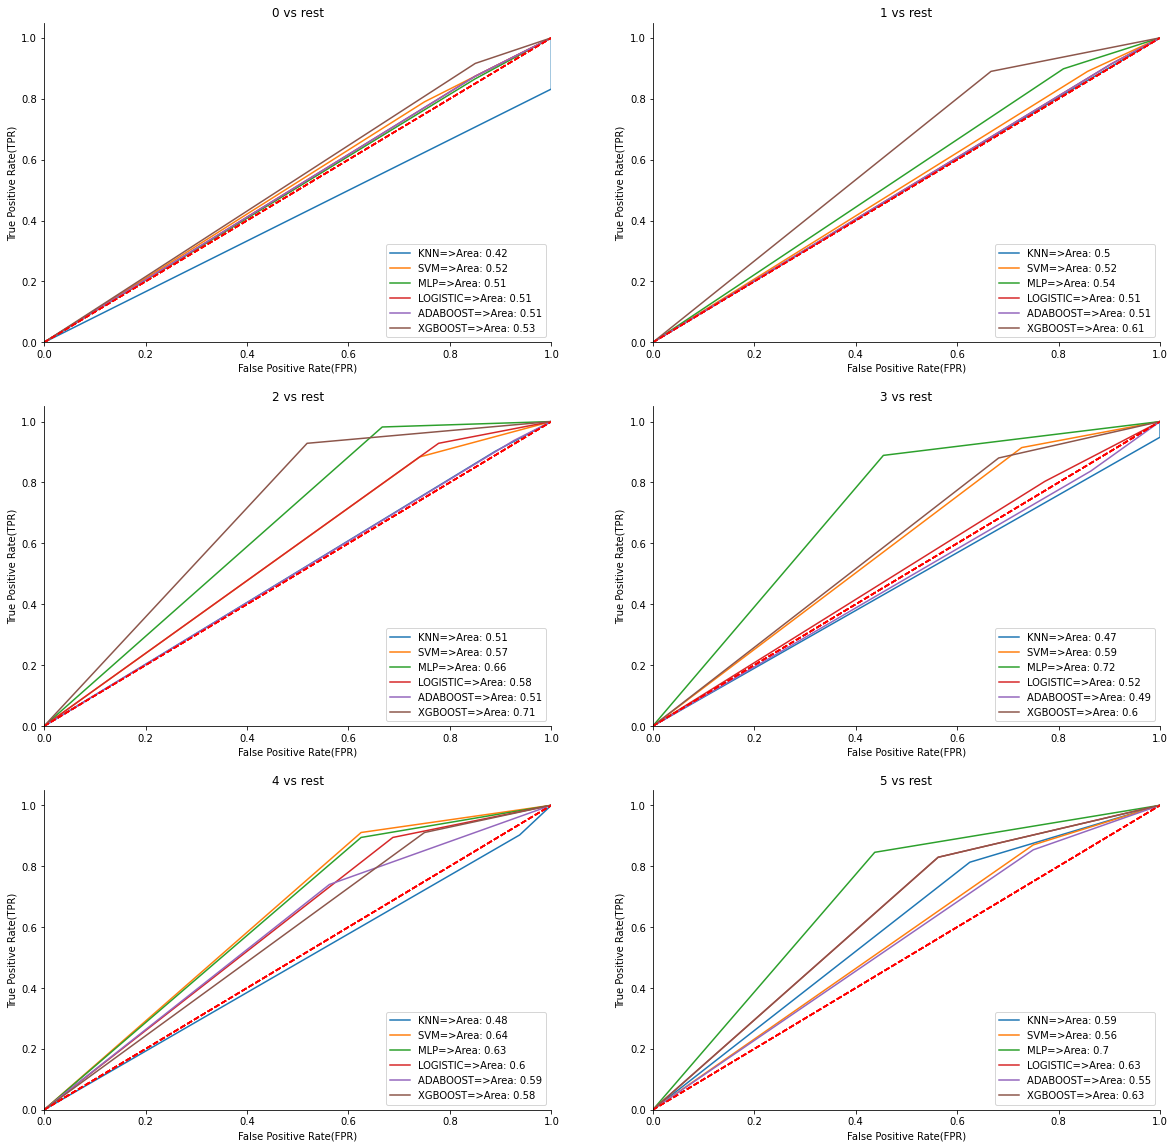

In [20]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report



## ROC Plotting function
def plot_roc(Y_test, ypr,axs,ll,x):   
    logit_roc_auc = roc_auc_score(Y_test, ypr,multi_class='ovr')
    fpr, tpr, _ = roc_curve(Y_test, ypr)
    axs.spines['right'].set_visible(False)
    axs.spines['top'  ].set_visible(False)
    axs.plot(fpr, tpr, label=ll+'=>Area: '+str(round(logit_roc_auc,2)))
    # axs.text(0.2,.6,'Area = %0.2f' % logit_roc_auc,size=15)
    axs.plot([0, 1], [0, 1],'r--')
    axs.set_xlim([0.0, 1.0])
    axs.set_ylim([0.0, 1.05])
    axs.set_xlabel('False Positive Rate(FPR)')
    axs.set_ylabel('True Positive Rate(TPR)')
    axs.set_title(f'{x} vs rest')
    axs.legend(loc="lower right")

_,axs = plt.subplots(3,2,figsize=(20,20))
for x in range(6):
    y0=[list(y_test),list(y_test),list(y_test),list(y_test),list(y_test),list(y_test)]
    yt0=[list(Knn.yhat),list(svm.yhat),list(mlp.yhat),list(lr.yhat),list(adaboost.yhat),list(xgboost.yhat)]
    for k in range(len(yt0)):
        for i in range(len(yt0[k])):
            if(y0[k][i]!=x):
                y0[k][i]=1
            else:
                y0[k][i]=0
            if(yt0[k][i]!=x):
                yt0[k][i]=1
            else:
                yt0[k][i]=0
    plot_roc(y0[0],yt0[0],axs[(x>=4)*1+(x>=2)*1+0][x%2],'KNN',x)
    plot_roc(y0[1],yt0[1],axs[(x>=4)*1+(x>=2)*1+0][x%2],'SVM',x)
    plot_roc(y0[2],yt0[2],axs[(x>=4)*1+(x>=2)*1+0][x%2],'MLP',x)
    plot_roc(y0[3],yt0[3],axs[(x>=4)*1+(x>=2)*1+0][x%2],'LOGISTIC',x)
    plot_roc(y0[4],yt0[4],axs[(x>=4)*1+(x>=2)*1+0][x%2],'ADABOOST',x)
    plot_roc(y0[5],yt0[5],axs[(x>=4)*1+(x>=2)*1+0][x%2],'XGBOOST',x)

plt.show()

In [21]:
from GET_FILE import *

In [22]:
f="ahang_2.mp3"
f1=GETFILE(f)

In [23]:
f1=pd.DataFrame(f1,dtype=float).T

In [24]:
a1=[i+12 for i in range(12)]+[i+36 for i in range(128)]

In [26]:
Knn.clf.predict(f1[a1])[0]

2.0

In [27]:

svm.clf.predict(f1[a1])[0]

2.0

In [28]:
adaboost.clf.predict(f1[a1])[0]

1.0

In [29]:
mlp.clf.predict(f1[a1])[0]

2.0

In [30]:
Knn.clf.predict(f1[a1])[0]

2.0